In [7]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show

In [2]:
#Import Dataset
dataset = pd.read_csv(r'C:\Users\mannami\Desktop\Python\DL Class\SOM\Credit_Card_Applications.csv')

In [3]:
#Split data by class = 1 or 0 (accepted or not)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
#Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [5]:
#Training the SOM

#Initialize SOM
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
#Initialize Weights
som.random_weights_init(X)
#Train SOM
som.train_random(X, 100)

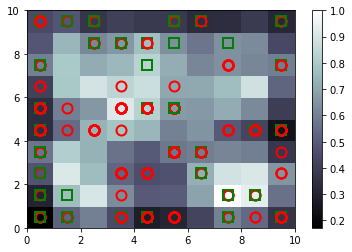

In [10]:
#Visualize Results

#Initialize the window containing the map
bone()
#Color nodes by mean inter-neuron distances
pcolor(som.distance_map().T)
#Legend
colorbar()
# Mark customers with green square if they did not get approval, red circle if did get approval
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]], 
         markerfacecolor= 'None', markersize=10, markeredgewidth=2)
show()

In [14]:
#Finding the frauds
mappings = som.win_map(X) #creates dictionary of customers
frauds = mappings[(7,1)] #creates list of customers at indicated position
# frauds = np.concatenate(mappings[(7,1)], mappings[8,1], axis=0) #code example for more than one node
frauds = sc.inverse_transform(frauds) #undo feature scaling
frauds

array([[1.5642336e+07, 0.0000000e+00, 5.7080000e+01, 3.3500000e-01,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.5200000e+02, 2.1980000e+03],
       [1.5740487e+07, 0.0000000e+00, 4.9000000e+01, 1.5000000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 2.8000000e+01],
       [1.5811742e+07, 0.0000000e+00, 3.6750000e+01, 5.1250000e+00,
        2.0000000e+00, 1.0000000e+01, 4.0000000e+00, 5.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 4.0010000e+03],
       [1.5715907e+07, 0.0000000e+00, 3.1570000e+01, 3.5000000e+00,
        2.0000000e+00, 2.0000000e+00, 4.0000000e+00, 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,